# **Shopper Spectrum:** 

# **Libraries Used**

In [367]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

import datetime as dt

# **About Dataset**

Load Dataset:

In [368]:
df = pd.read_csv('dataset\online_retail.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2023-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2023-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2023-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2023-12-09 12:50:00,4.15,12680.0,France


* There are 540k+ data and 8 columns

Dataset info:

In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


* Date-time conversion needed on Invoice date
* Invoice no & Stock code not needed  
* Missing values found

Dataset describe:

In [370]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


* Unusual min values on quantity and unit price.  

# **Dataset Clean**

In [371]:
df_clean = df.copy()

Remove cancelled invoices:

In [372]:
df_clean[df_clean['InvoiceNo'].str.startswith('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2022-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2022-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2022-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2022-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2022-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2023-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2023-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2023-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2023-12-09 11:58:00,1.25,17315.0,United Kingdom


In [373]:
df_clean = df_clean[~df_clean['InvoiceNo'].astype(str).str.startswith('C')]

Fixing quantity and unit price:

In [374]:
df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['UnitPrice'] > 0)]

Date conversion:

In [375]:
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

Drop nulls:

In [376]:
df_clean.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64

In [377]:
df_clean.dropna(inplace=True)

Drop unwanted columns:

In [378]:
# df_clean = df_clean.drop(columns=['InvoiceNo','StockCode','CustomerID'])

In [379]:
df_clean

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2023-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2023-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2023-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2023-12-09 12:50:00,4.15,12680.0,France


Remove duplicates:

In [380]:
df_clean.duplicated().sum()

np.int64(5192)

In [381]:
# df_clean.drop_duplicates(inplace=True)

Total price column:

In [382]:
df_clean['TotalPrice'] = round(df_clean['Quantity'] * df_clean['UnitPrice'],2)

Reset index:

In [383]:
df_clean.reset_index(drop=True, inplace=True)

Dataset cleaned:

In [384]:
df_clean

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
397879,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2023-12-09 12:50:00,0.85,12680.0,France,10.20
397880,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2023-12-09 12:50:00,2.10,12680.0,France,12.60
397881,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2023-12-09 12:50:00,4.15,12680.0,France,16.60
397882,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2023-12-09 12:50:00,4.15,12680.0,France,16.60


In [385]:
df_clean.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

Outlier detection:

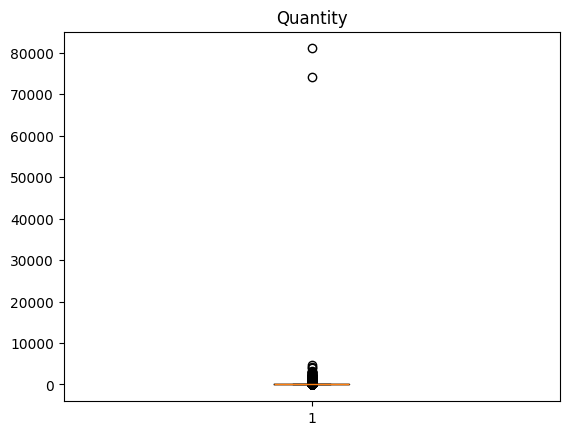

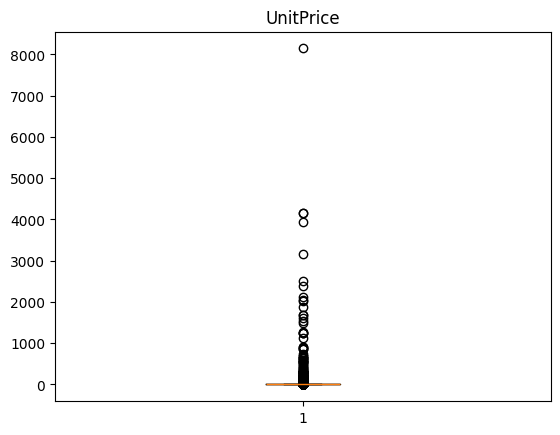

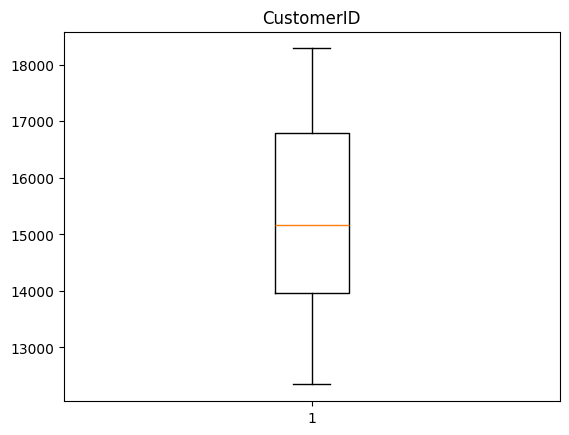

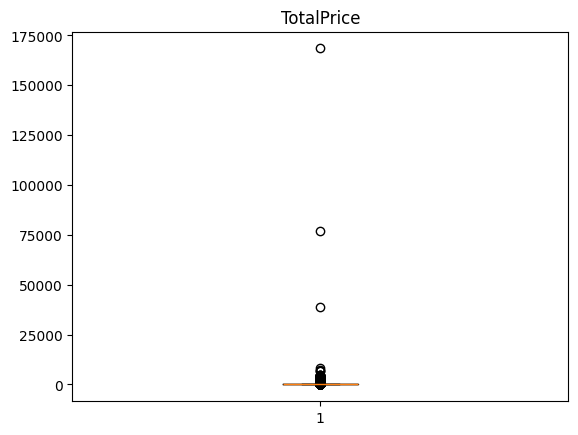

In [386]:
for i in df_clean.select_dtypes('number').columns:
    plt.boxplot(df_clean[i])
    plt.title(i)
    plt.show()
    print()

In [387]:
df_clean = df_clean[(df_clean['Quantity'] < 2000) & (df_clean['UnitPrice'] < 750) &(df_clean['TotalPrice'] < 6000)]

# **EDA**

1. Transaction volume by country:

In [388]:
country_transactions = df_clean.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)
country_transactions

Country
United Kingdom          16628
Germany                   457
France                    386
EIRE                      258
Belgium                    98
Netherlands                93
Spain                      90
Australia                  57
Portugal                   55
Switzerland                51
Finland                    41
Italy                      38
Sweden                     36
Norway                     36
Channel Islands            26
Poland                     19
Japan                      18
Denmark                    18
Austria                    17
Cyprus                     16
Unspecified                 8
Iceland                     7
Canada                      6
Malta                       5
Singapore                   5
Greece                      5
Israel                      5
USA                         5
Lithuania                   4
European Community          4
United Arab Emirates        3
Czech Republic              2
Bahrain                     2
Br

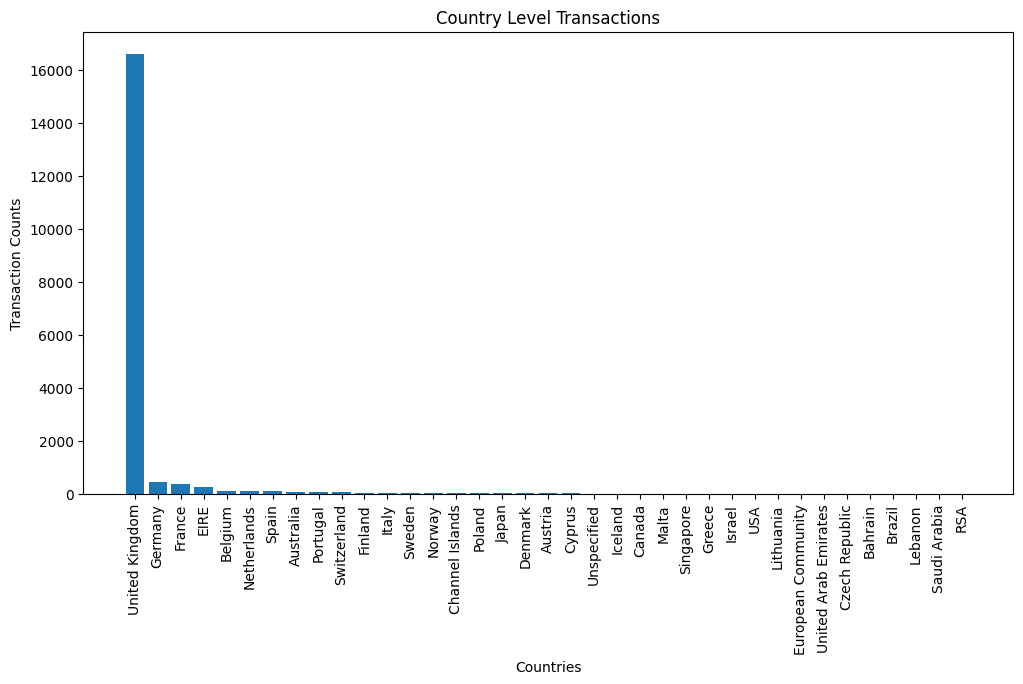

In [389]:
plt.figure(figsize=(12,6))
plt.bar(country_transactions.index,country_transactions.values)
plt.title('Country Level Transactions')
plt.xlabel('Countries')
plt.ylabel('Transaction Counts')
plt.xticks(rotation=90)
plt.show()

* UK has the highest transactions
* UK data makes the dataset highly imbalanced on other Countries.
* RSA, Saudi, Lebanon, Brazil has the lowest transaction.

2. Top-selling products:

In [390]:
top_seller = df_clean.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
top_seller

StockCode
85099B    46181
22197     44883
84077     44143
85123A    36782
21212     33693
84879     32482
22492     26076
22616     25345
17003     22963
23084     22762
Name: Quantity, dtype: int64

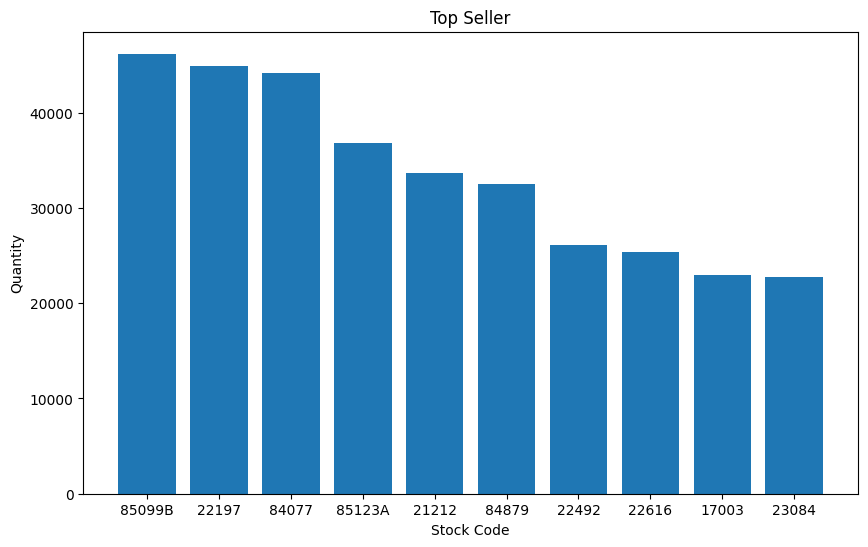

In [391]:
plt.figure(figsize=(10,6))
plt.bar(top_seller.index,top_seller.values)
plt.title('Top Seller')
plt.xlabel('Stock Code')
plt.ylabel('Quantity')
plt.show()

3. Purchase trends over time:

In [392]:
daily = df_clean.set_index('InvoiceDate').resample('D')['InvoiceNo'].nunique()

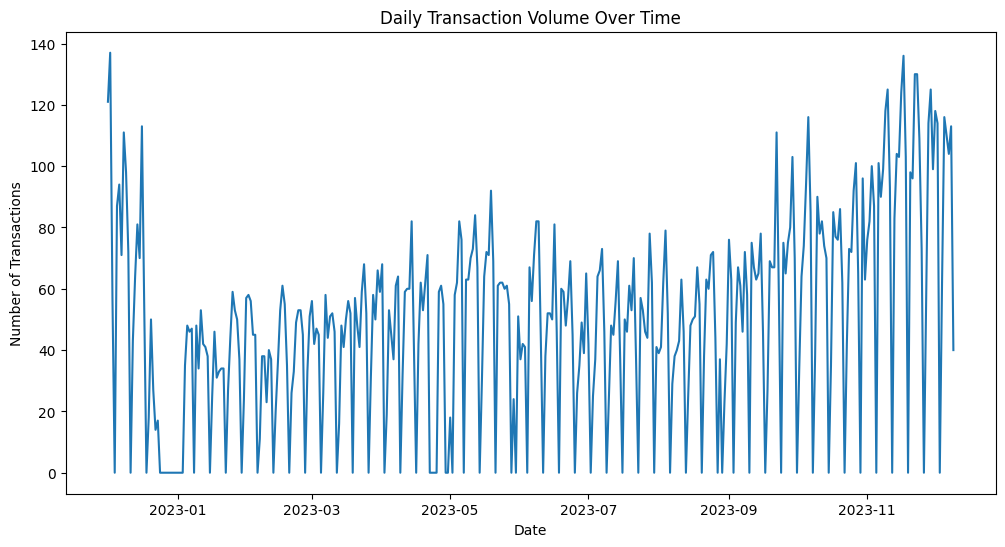

In [393]:
plt.figure(figsize=(12,6))
plt.plot(daily.index, daily.values)
plt.title("Daily Transaction Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.show()

In [394]:
monthly = df_clean.set_index('InvoiceDate').resample('MS')['InvoiceNo'].nunique()

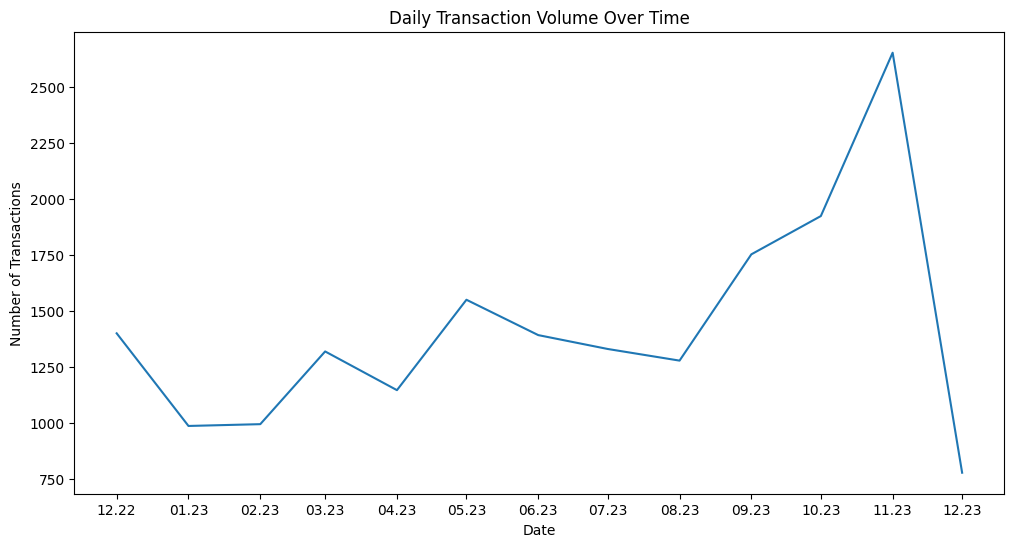

In [395]:
plt.figure(figsize=(12,6))
plt.plot(monthly.index, monthly.values)
plt.title("Daily Transaction Volume Over Time")
plt.xlabel("Date")
plt.xticks(ticks=monthly.index,labels=monthly.index.strftime('%m.%y'))
plt.ylabel("Number of Transactions")
plt.show()

* The transactions are not stable it has equal rise as well as its fall.

4. Heatmap:

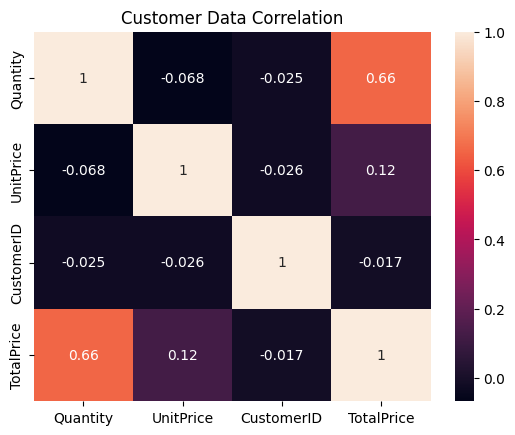

In [396]:
sns.heatmap(df_clean.corr(numeric_only=True),annot=True)
plt.title('Customer Data Correlation')
plt.show()

* Only positive correlation is total price & quantity.